In [1]:

%load_ext tensorboard

In [2]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import scipy as sp
import tensorflow as tf
import tensorflow.keras as keras
import zipfile
from tensorflow.keras import models
from tensorflow.keras import layers
import datetime

In [3]:
data_dir = '../projects/apple_disease_classification/data/Train'

import tensorflow as tf

img_height = 350
img_width = 350
batch_size = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

train_label = train_ds.class_names

Found 382 files belonging to 4 classes.


In [5]:

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_label = val_ds.class_names


Found 382 files belonging to 4 classes.
Using 38 files for validation.


In [6]:
test_data_dir = '../projects/apple_disease_classification/data/Test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=batch_size)
    


test_label = test_ds.class_names
print(test_label)

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


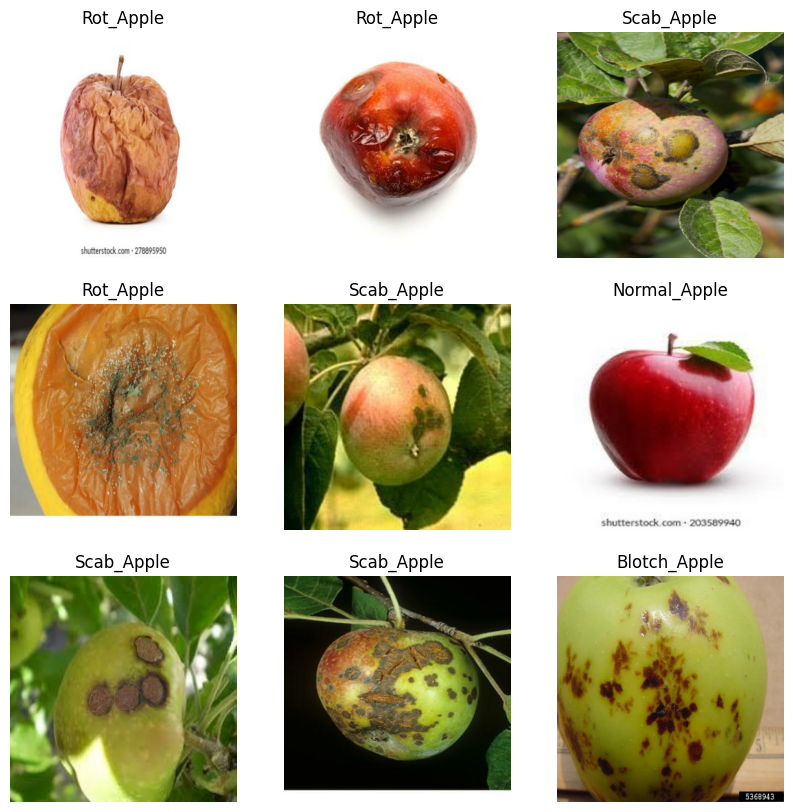

In [7]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

In [8]:
print(train_label)
print(val_label)

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
(32, 350, 350, 3)
(32,)


In [9]:
# def inspectData():
    
#     plt.figure(figsize=(10,10))
    
#     for i in range(16):
#         plt.subplot(4, 4, i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(imageObjects[i])
#         plt.xlabel(labelNames[labelNumbers[i]]) 

#     plt.show()   

In [10]:
# inspectData() 


In [11]:
num_classes = len(train_ds.class_names)

model = tf.keras.models.Sequential()
model.add(layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)))

# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(.25))
model.add(layers.Dense(256))
model.add(layers.Dropout(.25))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 350, 350, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 348, 348, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        3

In [12]:
lossFunction = keras.losses.SparseCategoricalCrossentropy()#SparseCategoricalCrossentropy (vervangen want nog maar 2 klassen)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 10

In [13]:
log_dir = "logs/log" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(train_ds, validation_data = val_ds, epochs=nrOfEpochs, batch_size=32, verbose=1,callbacks=[tensorboard_callback])

Epoch 1/10
12/12 [==============================] - 480s 38s/step - loss: 1.3576 - accuracy: 0.3403 - val_loss: 1.2675 - val_accuracy: 0.5789
Epoch 2/10
12/12 [==============================] - 445s 36s/step - loss: 1.1295 - accuracy: 0.5733 - val_loss: 0.8583 - val_accuracy: 0.6579
Epoch 3/10
 7/12 [================>.............] - ETA: 3:06 - loss: 0.9841 - accuracy: 0.6384

KeyboardInterrupt: 

In [ ]:
# model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
# history_test = model.fit(val_ds, epochs=nrOfEpochs, batch_size=32, verbose=2,callbacks=[tensorboard_callback])

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


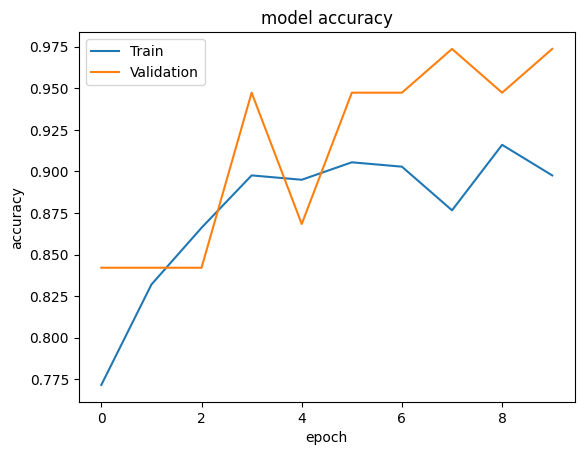

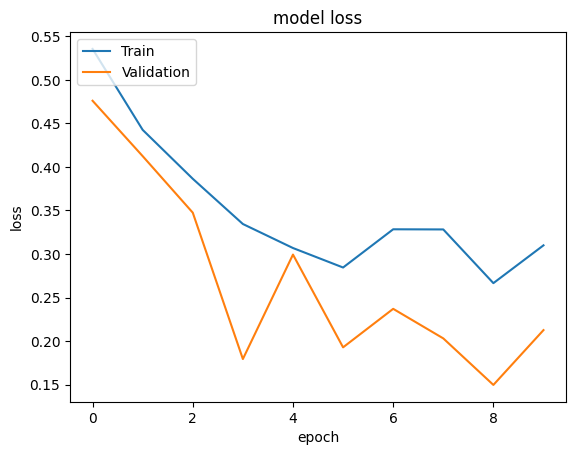

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.ylim(0,10)
plt.show()

In [ ]:
#%tensorboard --logdir logs/log

In [ ]:
'!kill 1464'

'!kill 1464'

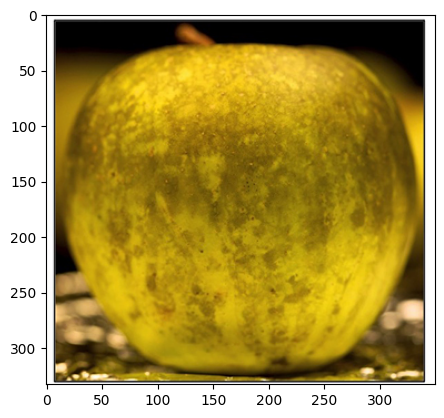

In [ ]:
img = Image.open('C:/Users/Anton/MakeAIWork2/projects/apple_disease_classification/data/Use/30.jpg')


#laat plaatje zien
plt.imshow(img)

#iets met predict doen

In [ ]:
img_array = tf.keras.utils.img_to_array(np.resize(img,(350,350,3)))
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Reject_Apple with a 73.10 percent confidence.


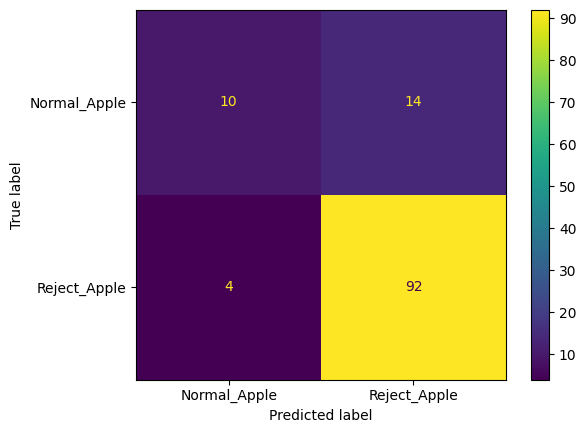

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
batchPredictions = model.predict(test_ds)
predicted_categories = tf.argmax(batchPredictions, axis=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
# confusion_matrix(predicted_categories, true_categories)


confusion_matrix = confusion_matrix(true_categories, predicted_categories)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['Normal_Apple', 'Reject_Apple'])

cm_display.plot()
plt.show() 

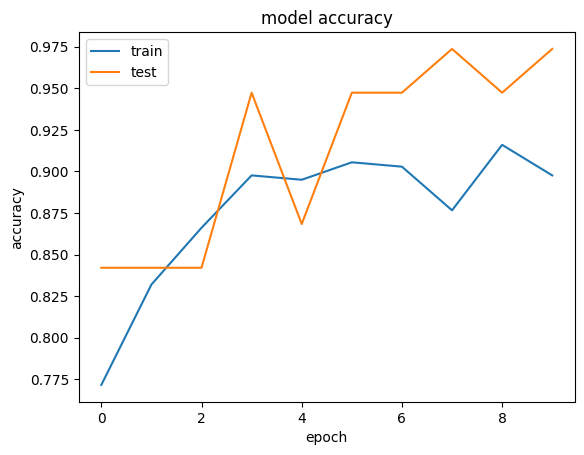

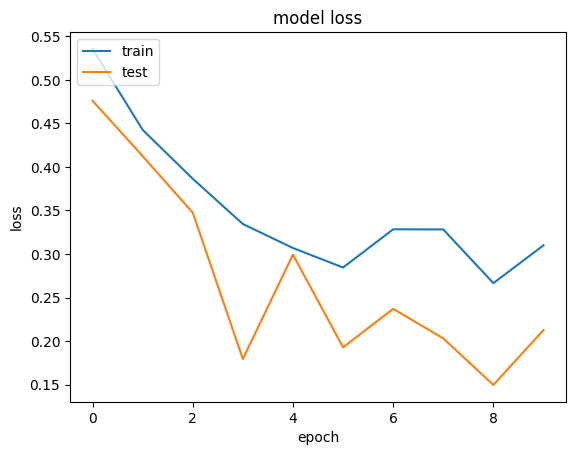

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()